In [1]:
import pandas as pd
import numpy as np
import os
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
path = '../data/'

In [3]:
# Read data on building features from the railbelt grid

building_features = pd.read_csv('../output/data_btu_railbelt.csv')

In [4]:
# Drop rows with missing btu values 
building_features_nonmissing = building_features.dropna()

In [5]:
# Create numpy arrays for scikit learn 

features_dropped = ['annual_btu_persqft', 'annual_btu', 'age', 'osm_id', 'zip_code', 'zip_group']
features_kept = building_features_nonmissing.drop(features_dropped, axis=1).columns

X = np.array(building_features_nonmissing.drop(features_dropped, axis=1))
y = np.array(building_features_nonmissing['annual_btu_persqft'])
y = y.reshape([y.shape[0],1])

Text(0.5, 1.0, 'Multi-Collinearity of Building Attributes')

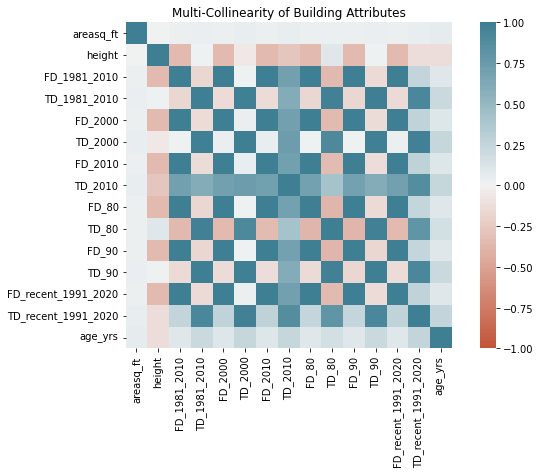

In [6]:
# Checking correlation among variables

fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(building_features_nonmissing.drop(features_dropped, axis=1).corr(), vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200), square = True)

ax.set_title('Multi-Collinearity of Building Attributes')

In [7]:
#sns.pairplot(building_features_nonmissing.drop(features_dropped, axis=1))

In [8]:
# Linear Regression

formula = 'annual_btu_persqft ~ %s'%(" + ".join(building_features_nonmissing.drop(features_dropped, axis=1).columns.values))


formula 

'annual_btu_persqft ~ areasq_ft + height + FD_1981_2010 + TD_1981_2010 + FD_2000 + TD_2000 + FD_2010 + TD_2010 + FD_80 + TD_80 + FD_90 + TD_90 + FD_recent_1991_2020 + TD_recent_1991_2020 + age_yrs'

In [9]:
lin_reg = smf.ols(formula, data=building_features_nonmissing).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     annual_btu_persqft   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 9.768e+05
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:55:55   Log-Likelihood:            -1.2475e+05
No. Observations:               74786   AIC:                         2.495e+05
Df Residuals:                   74774   BIC:                         2.496e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              98.6389      2.995     32.939      0.000      92.770     104.508
areasq_ft            1.684e-06   5.58e-07      3.020      0.003    5.91e-07    2.78e-06
height                 -0.0994      0.003    -36.613      0.000      -0.105      -0.094
FD_1981_2010        -3.813e+07    5.4e+07     -0.706      0.480   -1.44e+08    6.78e+07
TD_1981_2010         2.717e+07   3.85e+07      0.706      0.480   -4.83e+07    1.03e+08
FD_2000               3.74e+07    5.3e+07      0.706      0.480   -6.65e+07    1.41e+08
TD_2000             -5.873e+07   8.32e+07     -0.706      0.480   -2.22e+08    1.04e+08
FD_2010              2.469e+07    3.5e+07      0.706      0.480   -4.39e+07    9.33e+07
TD_2010             -4.967e+07   7.04e+07     -0.706      0.480   -1.88e+08    8.83e+07
FD_80                1.271e+07    1.8e+07      0.706      0.480   -2.26e+07     4.8e+07
TD_80               -9.057e+06   1.28e+07     -0.706      0.480   -3.42e+07    1.61e+07
FD_90                 3.74e+07    5.3e+07      0.706      0.480   -6.65e+07    1.41e+08
TD_90               -5.873e+07   8.32e+07     -0.706      0.480   -2.22e+08    1.04e+08
FD_recent_1991_2020 -7.408e+07   1.05e+08     -0.706      0.480    -2.8e+08    1.32e+08
TD_recent_1991_2020   1.49e+08   2.11e+08      0.706      0.480   -2.65e+08    5.63e+08
age_yrs                 1.1340      0.000   3153.100      0.000       1.133       1.135
==============================================================================
Omnibus:                      644.123   Durbin-Watson:                   0.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              665.797
Skew:                           0.220   Prob(JB):                    2.65e-145
Kurtosis:                       3.142   Cond. No.                     9.46e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.28e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [10]:
#Calcualte the error bar lengths for confidence intervals.
err_series = lin_reg.params - lin_reg.conf_int()[0]
err_series

Intercept              5.869347e+00
areasq_ft              1.093310e-06
height                 5.323589e-03
FD_1981_2010           1.058905e+08
TD_1981_2010           7.546514e+07
FD_2000                1.038820e+08
TD_2000                1.631189e+08
FD_2010                6.858518e+07
TD_2010                1.379639e+08
FD_80                  3.529682e+07
TD_80                  2.515505e+07
FD_90                  1.038820e+08
TD_90                  1.631189e+08
FD_recent_1991_2020    2.057555e+08
TD_recent_1991_2020    4.138916e+08
age_yrs                7.049200e-04
dtype: float64

In [11]:
#Remove intercept term as it's not meaningful

coef_df = pd.DataFrame({'coef': lin_reg.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
coef_df

,coef,err,varname
0,1.684424e-06,1.093310e-06,areasq_ft
1,-9.944510e-02,5.323589e-03,height
2,-3.812644e+07,1.058905e+08,FD_1981_2010
3,2.717164e+07,7.546514e+07,TD_1981_2010
4,3.740328e+07,1.038820e+08,FD_2000
5,-5.873185e+07,1.631189e+08,TD_2000
6,2.469447e+07,6.858518e+07,FD_2010
7,-4.967464e+07,1.379639e+08,TD_2010
8,1.270881e+07,3.529682e+07,FD_80
9,-9.057213e+06,2.515505e+07,TD_80


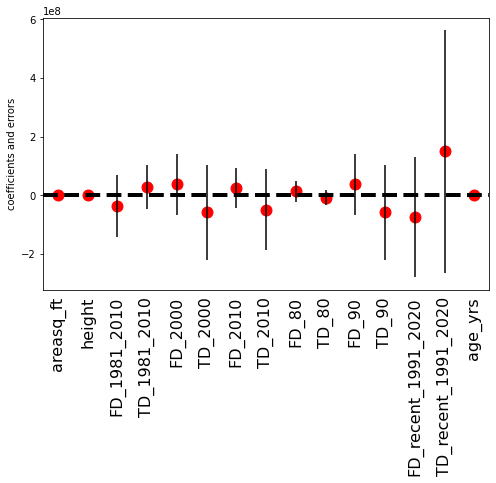

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('coefficients and errors')
ax.set_xlabel('')
ax.scatter(x=np.arange(coef_df.shape[0]), 
           marker='o', s=120, 
           y=coef_df['coef'], color='red')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(features_kept, 
                       rotation=90, fontsize=16)

# Scikit Learn

In [13]:
# Scale X

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

print(X)


[[-2.36647622e-01 -1.36319468e+00  6.30103054e-01 ...  6.24785266e-01
  -4.27196025e-01 -6.55471735e-01]
 [ 5.60365535e-01 -1.40887797e+00 -1.82141606e+00 ... -1.83340954e+00
  -8.28775438e-01  4.68359044e-01]
 [-2.49227319e-01 -1.72916194e+00 -1.62415591e+00 ... -1.64795878e+00
   2.05128845e+00  6.74235544e-01]
 ...
 [-1.89331561e-01 -1.43274316e-02  6.30103054e-01 ...  6.24785266e-01
  -4.27196025e-01 -1.82818238e+00]
 [-1.53472145e-01 -4.06869950e-01  6.30103054e-01 ...  6.24785266e-01
  -4.27196025e-01 -1.82818238e+00]
 [-2.72891665e-01 -6.33809416e-01 -2.43415856e-02 ... -1.67554736e-03
   1.67421160e+00 -1.82818238e+00]]


In [14]:
# Scale y

scaler = StandardScaler()
scaler.fit(y)
y = scaler.transform(y)

print(y)

[[-0.81007095]
 [ 0.79558361]
 [ 0.97646015]
 ...
 [-2.05842429]
 [-2.05842429]
 [-2.05842429]]


In [15]:
# Divide intro training and testing datasets, with a 30-70 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [16]:
# Linear Regression


lm = LinearRegression()
lm.fit(X_train,y_train)

y_pred_lm = lm.predict(X_test) # predicting using train dataset

coeffs = lm.coef_
print(coeffs)

[[ 1.02354838e-03 -1.24333115e-02 -8.75745906e+09  5.83905723e+11
  -2.65885340e+11 -7.99438081e+11 -2.52706628e+11 -7.04524925e+11
   2.95882747e+09 -1.84927536e+11 -2.75167410e+11 -7.36032506e+11
   7.99444854e+11  1.67875507e+12  1.00254084e+00]]


In [17]:
# Ridge Regression

ridge = Ridge(alpha= 0.5)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
coeffs = ridge.coef_
print(coeffs)

[[ 8.72347591e-04 -1.12940307e-02  5.42482587e-02  5.16348757e-02
  -4.61235570e-01 -3.22340905e-01 -1.18804882e-01 -2.47223495e-01
   7.15174272e-02  3.39589502e-02  5.35006433e-01  4.72133176e-01
  -6.47793727e-03 -6.44711667e-02  1.00265722e+00]]


In [18]:
# Ridge Regression with Cross Validation

ridgeCV = RidgeCV(cv=10).fit(X_train, y_train)

y_pred_ridgeCV = ridgeCV.predict(X_test)
coeffs = ridgeCV.coef_
print(coeffs)

[[ 9.08750543e-04 -1.14528383e-02 -8.93330760e-02  6.58325967e-02
  -1.33542280e+00 -3.39402293e-01  5.29952703e-01 -3.13337419e-01
   2.10510440e-01  1.97239839e-02  8.13943116e-01  5.46500935e-01
   1.77453492e-03 -7.42426385e-02  1.00269230e+00]]


In [19]:
# Displaying features with their coefficients from ridge


imp_feat = SelectFromModel(ridgeCV, prefit = True, threshold = 0) 

imp_index = imp_feat.get_support()

imp_feature_table = pd.DataFrame({'predictors':features_kept, 'coefficients': list(ridge.coef_[0])})[imp_index]

print(f'There are {len(imp_feature_table)} features')

imp_feature_table

There are 15 features


,predictors,coefficients
0,areasq_ft,0.000872
1,height,-0.011294
2,FD_1981_2010,0.054248
3,TD_1981_2010,0.051635
4,FD_2000,-0.461236
5,TD_2000,-0.322341
6,FD_2010,-0.118805
7,TD_2010,-0.247223
8,FD_80,0.071517
9,TD_80,0.033959


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

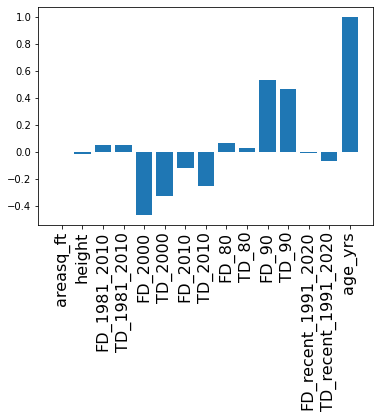

In [20]:
plt.bar(imp_feature_table['predictors'], imp_feature_table['coefficients'])
plt.xticks(rotation=90, fontsize=16)


In [21]:
# Polynomial Fit

poly_train = PolynomialFeatures(2)
X_train_poly = poly_train.fit_transform(X_train)

print(X_train_poly)

poly_test = PolynomialFeatures(2)
X_test_poly = poly_test.fit_transform(X_test)

print(X_test_poly)

[[ 1.00000000e+00  8.18514321e-02  1.18655243e+00 ...  4.31203486e-01
   4.36619026e-01  4.42102581e-01]
 [ 1.00000000e+00 -2.26629828e-01 -7.33075305e-01 ...  1.82496444e-01
  -3.14895653e-01  5.43349066e-01]
 [ 1.00000000e+00 -1.52588825e-01 -1.79117449e+00 ...  1.04905996e+01
   5.68394085e+00  3.07963176e+00]
 ...
 [ 1.00000000e+00 -1.73283072e-01 -3.77785597e-01 ...  4.31203486e-01
  -6.34187604e-02  9.32724177e-03]
 [ 1.00000000e+00 -4.04653369e-02  4.68438008e-02 ...  2.80298448e+00
   1.23409846e+00  5.43349066e-01]
 [ 1.00000000e+00 -2.15483622e-01 -5.14866430e-01 ...  1.82496444e-01
   6.21208883e-01  2.11456437e+00]]
[[ 1.         -0.2732712  -0.30132579 ...  0.18249644 -0.31489565
   0.54334907]
 [ 1.         -0.1503173  -1.11491751 ...  0.18249644 -0.31489565
   0.54334907]
 [ 1.         -0.02427797 -0.48251976 ...  0.18249644 -0.31489565
   0.54334907]
 ...
 [ 1.         -0.00357713 -0.60179733 ...  0.43120349  0.48403927
   0.54334907]
 [ 1.         -0.3047783   0.359649

In [22]:
# Linear Regression with Polynomial Fit

lm_poly = LinearRegression()
lm_poly.fit(X_train_poly,y_train)

y_pred_lm_poly = lm_poly.predict(X_test_poly) # predicting using train dataset

coeffs = lm_poly.coef_
print(coeffs)

[[-4.43801058e-03  1.70895313e-06 -1.22527773e-05  2.08224882e+06
  -3.85798990e+06 -4.83212057e+05  2.58168309e+06  1.82747383e+05
   1.41375794e+06 -7.03498410e+05  1.22185528e+06 -5.00122831e+05
   2.37691463e+06 -5.78250904e+05 -3.36871748e+06  1.02666995e+00
  -3.92706078e-07  7.42311928e-06  1.54627072e+06 -8.54651996e+07
  -1.81926307e+06  6.86677348e+07 -1.23756760e+06  4.50933199e+07
  -5.22428648e+05  2.70675010e+07 -1.88277357e+06  6.32215129e+07
   3.91508160e+06 -1.07449199e+08  4.28282935e-05 -5.99121830e-06
   5.23774900e+06 -2.36102828e+06 -1.25442253e+06  1.77825683e+06
   4.23240233e+05  1.10322045e+06 -1.76964519e+06  7.47756231e+05
  -1.29821444e+06  1.63721848e+06 -1.33893300e+06 -2.62877414e+06
  -4.75645065e-05  9.44811722e+05 -6.67682887e+05  1.66119855e+06
   1.35941800e+06  1.71572145e+06  2.77880394e+06 -9.10181829e+05
   9.99632203e+05 -4.51420427e+05  1.92409572e+06 -2.22989501e+06
  -1.57283214e+06  1.82547206e+06  4.27099319e+06 -2.47681558e+06
   1.48917

In [23]:
# Ridge Regression with Cross Validation and Polynomial Features

ridgeCV_poly = RidgeCV(cv=10).fit(X_train_poly,y_train)

y_pred_ridgeCV_poly = ridgeCV_poly.predict(X_test_poly)
coeffs = ridgeCV_poly.coef_
print(coeffs)

[[ 0.00000000e+00 -5.54174279e-05 -2.39293989e-06 -7.58514777e-03
  -1.76964356e-02 -8.45719264e-02 -1.87369563e-01 -1.23407956e-01
   8.16433794e-02  1.04427054e-03  1.54864538e-01  5.81494967e-02
   4.28524825e-03 -4.72091520e-02 -2.98701812e-02  1.02662387e+00
  -3.43201170e-07  1.38297556e-05 -4.34679689e-03  5.05129072e-04
   1.07014576e-02 -2.59143839e-03  1.63345633e-02 -1.69527680e-03
  -9.43284501e-03  4.58213466e-03 -1.37841216e-02 -9.29077493e-06
   3.96539589e-03 -1.62053568e-03  8.29811621e-05 -8.01359383e-06
   6.21500546e-03 -1.47564676e-03 -2.38924709e-02  1.50168869e-02
  -2.30143021e-02  9.17547444e-03  2.83488221e-02  2.37700636e-03
   1.31009231e-02 -2.29623708e-02 -1.07487449e-02  1.70935173e-03
  -5.72238510e-05  3.87473021e-03  1.16603270e-03  2.64574495e-02
  -1.32417996e-02 -9.80687089e-03 -1.89075147e-02 -1.41758289e-02
  -1.07727019e-02  1.61064259e-04  2.80471155e-02  5.84978765e-03
  -3.53610236e-03 -1.85022451e-02  1.57427775e-02 -4.20609940e-02
   2.75052

In [24]:
# Decision tree

dt = DecisionTreeRegressor(random_state=3).fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [25]:
# Random Forest Regressor

rf = RandomForestRegressor(max_depth=15, random_state=3)
rf.fit(X_train, y_train.reshape(len(y_train)))

y_pred_rf = rf.predict(X_test)


In [26]:

mse_lm = mean_squared_error(y_test, y_pred_lm)
print("MSE model_linear:", mse_lm)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("MSE model_ridge:", mse_ridge)
mse_ridgeCV = mean_squared_error(y_test, y_pred_ridgeCV)
print("MSE model_ridgeCV:", mse_ridgeCV)
mse_lm_poly = mean_squared_error(y_test, y_pred_lm_poly)
print("MSE model_linear_polynomial:", mse_lm_poly)
mse_ridgeCV_poly = mean_squared_error(y_test, y_pred_ridgeCV_poly)
print("MSE model_ridgeCV_poly:", mse_ridgeCV_poly)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("MSE model_dt:", mse_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("MSE model_rf:", mse_rf)

MSE model_linear: 0.006950340655484211
MSE model_ridge: 0.006977310191049635
MSE model_ridgeCV: 0.00697622019169604
MSE model_linear_polynomial: 2.878185755432881e-06
MSE model_ridgeCV_poly: 2.4278735673317727e-06
MSE model_dt: 2.916655167684027e-07
MSE model_rf: 1.271204617860134e-07


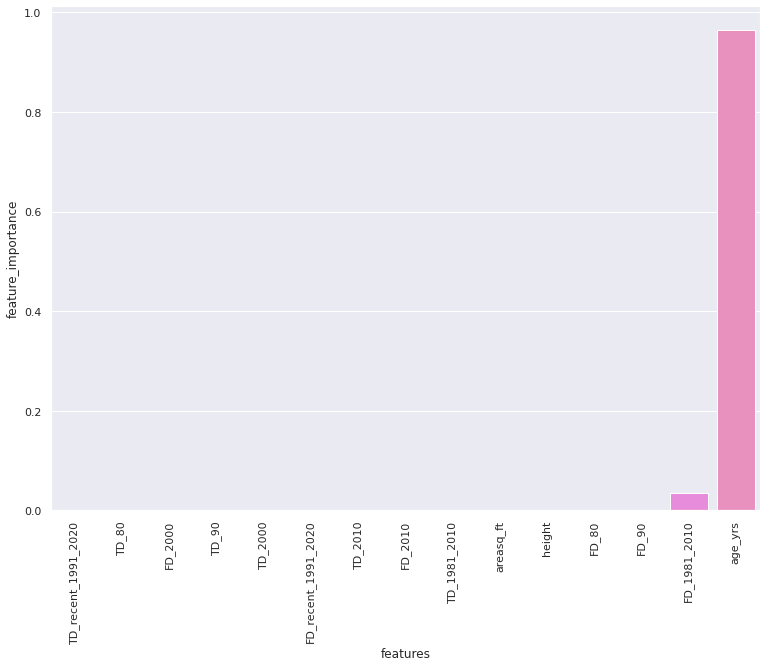

In [27]:
# # Displaying features with their importances from decision tree

f = pd.DataFrame({'features' : list(features_kept), 'feature_importance' : list(dt.feature_importances_ )})
f = f.sort_values(by = 'feature_importance')

sns.set(rc={'figure.figsize':(12.7,9.27)})

barplot = sns.barplot(x='features', y = 'feature_importance', data = f)

ticks = barplot.set_xticklabels(barplot.get_xticklabels(),rotation = 90)
